# Aula 5 de Aprendizado de Máquina e Reconhecimento de Padrões

Prof. Dr. Rodrigo Colnago Contreras

contreras@unifesp.br



## Programa

- Introdução
- Métricas de Desempenho para Classificadores
- Planejamento de Experimentos e Desempenho preditivo


# Introdução

Em problemas de **aprendizado supervisionado**, especialmente os de **classificação**, o principal objetivo de um modelo é tomar decisões corretas: identificar corretamente a que classe pertence cada novo exemplo. No entanto, construir um modelo não é o fim do processo — é essencial saber o quanto ele acerta ou erra.

Essa análise é feita por meio de **métricas de avaliação**, que servem para quantificar o desempenho do algoritmo. Estas nos dizem, de forma objetiva, o quão bem o modelo está conseguindo **resolver o problema para o qual foi treinado**. Sem essas métricas, não há como saber se um modelo é realmente eficaz ou apenas está fazendo “chutes” disfarçados de inteligência.

Além disso, **avaliar o desempenho vai muito além de contar quantas vezes o modelo acertou ou errou em um conjunto de dados**. O **verdadeiro desafio é estimar como esse modelo vai se comportar em situações futuras**, com dados nunca antes vistos — ou seja, no mundo real.

Para isso, é fundamental aplicar técnicas de **planejamento experimental**, como a separação dos dados em conjuntos de treino e teste, ou o uso de **validação cruzada**. Essas estratégias permitem simular, de forma controlada, como o modelo reagiria diante de novos exemplos, e com isso estimar sua capacidade de generalização.

Em resumo, medir o desempenho de um classificador não é apenas uma formalidade — é uma etapa central para garantir que o modelo será útil, confiável e aplicável fora do ambiente de testes. E isso só é possível quando usamos métricas bem definidas e planejamos cuidadosamente a forma como avaliamos nossos algoritmos.

# Métricas de Desempenho para Classificadores



### **Suposições Iniciais**

Vamos considerar o seguinte cenário de classificação binária:

* Temos um **conjunto de treinamento** (`X_treino, y_treino`) formado por \$n\$ pares \$(\mathbf{x}\_i, y\_i)\$, onde:

  * \$\mathbf{x}\_i \in \mathbb{R}^d\$ representa um vetor de atributos com \$d\$ dimensões,
  * \$y\_i \in {-1, +1}\$ representa o rótulo binário associado a \$\mathbf{x}\_i\$,
  * para \$i = 1, 2, \dots, n\$.

* Também dispomos de um **conjunto de testes** (`X_teste, y_teste`) com \$m\$ exemplos \$(\mathbf{x}\_j, y\_j)\$ construídos da mesma forma, ou seja:

  * \$\mathbf{x}\_j \in \mathbb{R}^d\$,
  * \$y\_j \in {-1, +1}\$,
  * para \$j = 1, 2, \dots, m\$.

* Suponha que, com base apenas nos dados de treinamento, foi definida uma função **modelo**:

$$
f: \mathbb{R}^d \rightarrow \{-1, +1\}
$$

Essa função \$f\$ recebe um vetor de características \$\mathbf{x}\$ e retorna uma predição de classe.

**Importante:** O objetivo agora é **avaliar a qualidade dessa função** sobre os exemplos do **conjunto de testes**, comparando \$f(\mathbf{x}\_j)\$ com os verdadeiros rótulos \$y\_j\$.

---




## Métricas de Avaliação em Classificação Binária

Vamos considerar o seguinte cenário:

- Um conjunto de **teste** com $m$ exemplos $(\mathbf{x}_j, y_j)$, onde $\mathbf{x}_j \in \mathbb{R}^d$ e $y_j \in \{-1, +1\}$.
- Um modelo treinado previamente define uma função $f: \mathbb{R}^d \rightarrow \{-1, +1\}$.
- Avaliamos o desempenho do modelo comparando os valores reais (`y_teste`) com as predições (`y_pred`) geradas por $f$.

---

## 🟩 True Positives (TP)

Número de exemplos com rótulo real +1 que foram corretamente classificados como +1 pelo modelo.

**Intuição**: acertos do modelo na classe positiva.

$$
TP = \text{número de casos em que } y_j = +1 \text{ e } f(\mathbf{x}_j) = +1
$$

```python
def true_positives(y_true, y_pred):
    return sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == 1)
````

---

## 🟥 False Negatives (FN)

Número de exemplos com rótulo real +1 que foram classificados incorretamente como -1.

**Intuição**: o modelo deixou passar um positivo — um caso importante foi ignorado.

$$
FN = \text{número de casos em que } y_j = +1 \text{ e } f(\mathbf{x}_j) = -1
$$

```python
def false_negatives(y_true, y_pred):
    return sum(1 for yt, yp in zip(y_true, y_pred) if yt == 1 and yp == -1)
```

---

## 🟧 False Positives (FP)

Número de exemplos com rótulo real -1 que foram classificados incorretamente como +1.

**Intuição**: falso alarme — o modelo sinalizou positividade onde não havia.

$$
FP = \text{número de casos em que } y_j = -1 \text{ e } f(\mathbf{x}_j) = +1
$$

```python
def false_positives(y_true, y_pred):
    return sum(1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == 1)
```

---

## 🟦 True Negatives (TN)

Número de exemplos com rótulo real -1 que foram corretamente classificados como -1.

**Intuição**: acertos do modelo na classe negativa.

$$
TN = \text{número de casos em que } y_j = -1 \text{ e } f(\mathbf{x}_j) = -1
$$

```python
def true_negatives(y_true, y_pred):
    return sum(1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == -1)
```

---

## Exemplo de uso:

```python
# Rótulos reais e predições
y_teste = [1, -1, 1, -1, 1, 1, -1, -1, -1, 1]
y_pred  = [1, -1, -1, -1, 1, 1, 1, -1, -1, -1]

TP = true_positives(y_teste, y_pred)
FN = false_negatives(y_teste, y_pred)
FP = false_positives(y_teste, y_pred)
TN = true_negatives(y_teste, y_pred)

print(f"TP = {TP}")
print(f"FN = {FN}")
print(f"FP = {FP}")
print(f"TN = {TN}")
```



## Matriz de Confusão para Classificação Binária

A **matriz de confusão** resume o desempenho de um classificador ao comparar os rótulos previstos pelo modelo com os rótulos reais dos dados de teste.

Assumindo um problema de classificação binária com rótulos $+1$ (classe positiva) e $-1$ (classe negativa), a matriz de confusão é organizada da seguinte forma:

|                       | **Previsto: +1** | **Previsto: -1** |
|-----------------------|------------------|------------------|
| **Real: +1** (positiva)   | True Positive (TP)  | False Negative (FN) |
| **Real: -1** (negativa)   | False Positive (FP) | True Negative (TN)  |
---

### 📌 Representação simbólica:

$$
\begin{array}{c|cc}
\text{Real} \backslash \text{Predito} & +1 & -1 \\
\hline
+1 & TP & FN \\
-1 & FP & TN \\
\end{array}
$$

---

### 🔍 Interpretações importantes:

- As **linhas** correspondem às **classes reais** (a verdade dos dados).
- As **colunas** correspondem às **classes previstas** pelo modelo.
- A célula $(i, j)$ indica quantas vezes a classe real foi $i$ e a predição foi $j$.

---

### 🟩 Diagonal Principal (TP e TN)

- Compreende os casos **em que o modelo acertou a predição**:
  - **TP (True Positives)**: reais +1 corretamente previstos como +1.
  - **TN (True Negatives)**: reais -1 corretamente previstos como -1.
- Quanto mais valores nessa diagonal, **melhor o desempenho do classificador**.

---

### 🟥 Diagonal Secundária (FP e FN)

- Representa os **erros do modelo**:
  - **FN (False Negatives)**: reais +1 classificados erroneamente como -1.
  - **FP (False Positives)**: reais -1 classificados erroneamente como +1.
- Casos que impactam diretamente a **confiabilidade** e o **custo dos erros** no mundo real.


---

Essa matriz é a base para definição de diversas métricas como **acurácia**, **precisão**, **revocação** e **F1-score**, que veremos a seguir.


## Métricas de Desempenho em Classificação Binária

A seguir, apresentamos as principais métricas derivadas da matriz de confusão, com definições formais, significados intuitivos e interpretações práticas.

---

### 🎯 Acurácia (Accuracy)

**Definição**: proporção de predições corretas (positivas e negativas) em relação ao total de exemplos.

$$
\text{Acurácia} = \frac{TP + TN}{TP + TN + FP + FN}
$$

**Intuição**: indica o quanto o modelo acerta **no geral**.

**Cuidado**: pode ser **enganosa em problemas desbalanceados** (ex: se 95% dos exemplos forem negativos, um modelo que prevê tudo como negativo terá 95% de acurácia sem ser útil).

---

### 🎯 Precisão (Precision ou Positive Predictive Value)

**Definição**: proporção dos exemplos **preditos como positivos** que realmente eram positivos.

$$
\text{Precisão} = \frac{TP}{TP + FP}
$$

**Intuição**: mede **a confiança do modelo ao dizer que algo é positivo**.

**Uso prático**: importante quando o **custo de um falso positivo** é alto  
(ex: diagnóstico de câncer — um falso alarme pode causar medo e exames desnecessários).

---

### 🎯 Revocação (Recall ou Sensibilidade ou True Positive Rate)

**Definição**: proporção de exemplos **realmente positivos** que foram corretamente classificados.

$$
\text{Revocação} = \frac{TP}{TP + FN}
$$

**Intuição**: mede **a capacidade do modelo de "lembrar" de todos os positivos**.

**Uso prático**: importante quando o **custo de um falso negativo** é alto  
(ex: exames médicos que não podem deixar de detectar uma doença real).

---

### 🎯 F1-Score

**Definição**: média harmônica entre precisão e revocação.

$$
F1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Revocação}}{\text{Precisão} + \text{Revocação}} = \frac{2}{\frac{1}{\text{Precision}} + \frac{1}{\text{Recall}}}
$$

**Intuição**: equilíbrio entre **confiabilidade** (precisão) e **abrangência** (revocação).

**Uso prático**: útil quando há **classes desbalanceadas** e queremos considerar ao mesmo tempo FP e FN.

---

### 🎯 Especificidade (Specificity ou True Negative Rate)

**Definição**: proporção de exemplos **realmente negativos** que foram corretamente classificados como negativos.

$$
\text{Especificidade} = \frac{TN}{TN + FP}
$$

**Intuição**: mede **a capacidade do modelo de identificar corretamente os negativos**.

**Uso prático**: útil quando é importante **não gerar falsos positivos**  
(ex: sistema antifraude que não deve bloquear transações legítimas).

---

### 🎯 False Positive Rate (Taxa de Falsos Positivos)

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

**Intuição**: taxa de falsos alarmes — complementa a especificidade:

$$
\text{FPR} = 1 - \text{Especificidade}
$$

---

### 🎯 Negative Predictive Value (NPV)

**Definição**: proporção dos exemplos **preditos como negativos** que realmente eram negativos.

$$
\text{NPV} = \frac{TN}{TN + FN}
$$

**Intuição**: confiabilidade ao afirmar que um exemplo é negativo.

---

### 🎯 Balanced Accuracy

**Definição**: média entre sensibilidade (recall) e especificidade.

$$
\text{Balanced Accuracy} = \frac{\text{Revocação} + \text{Especificidade}}{2}
$$

**Intuição**: útil para **problemas com classes desbalanceadas**, pois dá peso igual ao acerto em ambas as classes.

---

### 🎯 Matthews Correlation Coefficient (MCC)

**Definição**:

$$
MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}
$$

**Intuição**: valor entre -1 e 1 que mede a **correlação entre predição e verdade**.

- $MCC = 1$: predição perfeita  
- $MCC = 0$: predição aleatória  
- $MCC = -1$: total desacordo entre predição e verdade

**Uso prático**: recomendada quando as classes estão desbalanceadas.

---

### 🧮 Considerações Finais

- Use **acurácia** apenas quando as classes estiverem aproximadamente balanceadas.
- Prefira **F1-score** e **balanced accuracy** para lidar com classes desbalanceadas.
- **Revocação** e **precisão** devem ser priorizadas conforme os custos de FN e FP.
- Métricas como **MCC** ou **AUC** oferecem visões mais robustas da performance geral do classificador.

---

A seguir, vamos implementar essas métricas passo a passo, utilizando apenas Python puro.


In [ ]:
# Função para calcular TP, TN, FP, FN
def confusion_counts(y_true, y_pred):
    tp = sum(1 for yt, yp in zip(y_true, y_pred) if yt ==  1 and yp ==  1)
    tn = sum(1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp == -1)
    fp = sum(1 for yt, yp in zip(y_true, y_pred) if yt == -1 and yp ==  1)
    fn = sum(1 for yt, yp in zip(y_true, y_pred) if yt ==  1 and yp == -1)
    return tp, tn, fp, fn

# Métricas de desempenho
def accuracy(tp, tn, fp, fn):
    total = tp + tn + fp + fn
    return (tp + tn) / total if total != 0 else 0

def precision(tp, fp):
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall(tp, fn):
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def specificity(tn, fp):
    return tn / (tn + fp) if (tn + fp) != 0 else 0

def f1_score(tp, fp, fn):
    prec = precision(tp, fp)
    rec = recall(tp, fn)
    return 2 * prec * rec / (prec + rec) if (prec + rec) != 0 else 0

def npv(tn, fn):
    return tn / (tn + fn) if (tn + fn) != 0 else 0

def false_positive_rate(fp, tn):
    return fp / (fp + tn) if (fp + tn) != 0 else 0

def balanced_accuracy(tp, fn, tn, fp):
    sens = recall(tp, fn)
    spec = specificity(tn, fp)
    return (sens + spec) / 2

def matthews_corrcoef(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))**0.5
    return numerator / denominator if denominator != 0 else 0

# Exemplo de uso
y_true = [1, -1, 1, -1, 1, 1, -1, -1, -1, 1]
y_pred = [1, -1, -1, -1, 1, 1, 1, -1, -1, -1]

tp, tn, fp, fn = confusion_counts(y_true, y_pred)

print(f"TP = {tp}, TN = {tn}, FP = {fp}, FN = {fn}\n")

print("Acurácia:", accuracy(tp, tn, fp, fn))
print("Precisão:", precision(tp, fp))
print("Revocação (Recall):", recall(tp, fn))
print("F1-Score:", f1_score(tp, fp, fn))
print("Especificidade:", specificity(tn, fp))
print("NPV:", npv(tn, fn))
print("FPR (Taxa de falsos positivos):", false_positive_rate(fp, tn))
print("Balanced Accuracy:", balanced_accuracy(tp, fn, tn, fp))
print("MCC:", matthews_corrcoef(tp, tn, fp, fn))


TP = 3, TN = 4, FP = 1, FN = 2

Acurácia: 0.7
Precisão: 0.75
Revocação (Recall): 0.6
F1-Score: 0.6666666666666665
Especificidade: 0.8
NPV: 0.6666666666666666
FPR (Taxa de falsos positivos): 0.2
Balanced Accuracy: 0.7
MCC: 0.408248290463863


## **Exercício**: Avaliação de Desempenho de um Classificador SVM no Problema do Titanic

Neste exercício, você irá praticar o cálculo e interpretação de métricas de avaliação em um problema de classificação binária real.

---

### 🛳️ **Contexto**

O conjunto de dados utilizado será a base pública do **desastre do Titanic**, amplamente empregada em problemas de aprendizado de máquina. A tarefa consiste em prever se um passageiro sobreviveu (`Survived = 1`) ou não (`Survived = 0`), com base em características como sexo, idade, classe, etc.

---

### 🎯 **Tarefa**

1. **Carregue** o dataset de treino do Titanic, disponível em:


[https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)


2. **Separe** as colunas de interesse para treinamento do modelo. Use pelo menos:
- `Pclass` (classe),
- `Sex` (após codificação para número),
- `Age` (após tratamento de valores ausentes),
- `Fare` (valor da passagem).

A variável alvo será:
- `Survived` (1 = sobreviveu, 0 = não sobreviveu)

3. **Divida** o conjunto de dados em:
- **75% para treino**
- **25% para teste**
Faça a divisão preservando a ordem original dos dados (não há necessidade de embaralhar).

4. **Treine** um classificador SVM (Support Vector Machine) sobre os 75% primeiros exemplos.

5. **Avalie** o modelo nos 25% finais. Calcule e apresente:

- Acurácia
- Precisão
- Revocação (Recall)
- F1-Score
- Especificidade
- Taxa de falsos positivos (FPR)
- Acurácia balanceada
- MCC (coeficiente de correlação de Matthews)

6. **Interprete os resultados**. Em poucas linhas, comente quais aspectos do desempenho o modelo apresentou melhor e onde ele falhou.

---

In [ ]:
# Solução:~>

# Generalizar o código para aceitar qualquer função de kernel
import cvxpy as cp
import numpy as np

def treinar_svm_dual_generico(X, y, C=1.0, kernel_fn=None):
    """
    Treina uma SVM dual com cvxpy usando um kernel genérico.

    Retorna:
    - classificador (função que retorna -1 ou +1)
    - suporte_alphas, suporte_vetores, suporte_labels, bias
    """
    n = X.shape[0]
    y = y.astype(float)

    # Calcular matriz kernel
    K = kernel_fn(X, X)
    Q = np.outer(y, y) * K

    # Problema dual
    alpha = cp.Variable(n)
    objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(alpha, cp.psd_wrap(Q)))
    constraints = [alpha >= 0, alpha <= C, cp.sum(cp.multiply(alpha, y)) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    alpha_val = alpha.value
    support_indices = np.where(alpha_val > 1e-5)[0]
    support_alphas = alpha_val[support_indices]
    support_vectors = X[support_indices]
    support_labels = y[support_indices]

    # Função kernel entre vetor e base
    def kernel_vector(x, Y):
        return kernel_fn(Y, np.atleast_2d(x)).ravel()

    # Calcular bias b
    K_sv = kernel_fn(support_vectors, support_vectors)
    b_vals = support_labels - np.sum((support_alphas * support_labels)[:, None] * K_sv, axis=0)
    b = np.mean(b_vals)

    # Classificador
    def classificador(x):
        k_vals = kernel_vector(x, support_vectors)
        return np.sign(np.sum(support_alphas * support_labels * k_vals) + b)

    return classificador, support_alphas, support_vectors, support_labels, b


In [ ]:
# Solução:

import pandas as pd

df = pd.read_csv('/content/train.csv')

# df.head()

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'] = df['Embarked'].apply(lambda x : 0 if x == 'S' else (1 if x == 'C' else 2))
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'male' else 1)

df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Survived'] = df['Survived'].apply(lambda x: 1 if x == 1 else -1)

n = len(df)

n_treino = int(0.75 * n)
n_teste  = n - n_treino

df_treino = df.iloc[:n_treino]
df_teste = df.iloc[n_treino:]

X_treino = df_treino[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y_treino = df_treino['Survived'].values

X_teste  = df_teste[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y_teste  = df_teste['Survived'].values

# kernel = lambda x, y: np.exp(-np.linalg.norm(x - y, axis=1)**2)

def kernel(X1, X2, gamma=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    # sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return X1 @ X2.T #np.dot(X1, X2)#np.exp(-gamma * sq_dists)

classificador, support_alphas, support_vectors, support_labels, b = treinar_svm_dual_generico(X_treino, y_treino, kernel_fn=kernel)

y_pred = np.zeros((n_teste,))
for i in range(n_teste):
  y_pred[i] = classificador(X_teste[i,:])

tp, tn, fp, fn = confusion_counts(y_teste, y_pred)

print(f"TP = {tp}, TN = {tn}, FP = {fp}, FN = {fn}\n")

print("Acurácia:", accuracy(tp, tn, fp, fn))
print("Precisão:", precision(tp, fp))
print("Revocação (Recall):", recall(tp, fn))
print("F1-Score:", f1_score(tp, fp, fn))
print("Especificidade:", specificity(tn, fp))
print("NPV:", npv(tn, fn))
print("FPR (Taxa de falsos positivos):", false_positive_rate(fp, tn))
print("Balanced Accuracy:", balanced_accuracy(tp, fn, tn, fp))
print("MCC:", matthews_corrcoef(tp, tn, fp, fn))


TP = 53, TN = 123, FP = 18, FN = 29

Acurácia: 0.7892376681614349
Precisão: 0.7464788732394366
Revocação (Recall): 0.6463414634146342
F1-Score: 0.69281045751634
Especificidade: 0.8723404255319149
NPV: 0.8092105263157895
FPR (Taxa de falsos positivos): 0.1276595744680851
Balanced Accuracy: 0.7593409444732746
MCC: 0.5368668619209779


# 🔮 Predição de Desempenho: como estimar o erro em dados que ainda não vimos?

Ao treinarmos um modelo de classificação, uma das principais dúvidas que surge é:  
**"Como ele vai se comportar quando for aplicado em situações reais, com dados totalmente novos?"**

Infelizmente, **não temos como saber com certeza** o quão bem (ou mal) um modelo vai se sair em dados futuros. Em outras palavras:

> 🧠 **É impossível saber exatamente qual será o erro do modelo no mundo real.**

Isso acontece porque o modelo é treinado com base em **amostras limitadas**, que nem sempre representam perfeitamente toda a variedade, ruído ou complexidade dos dados que podem surgir depois.

---

### 🧪 Então, o que podemos fazer?

Podemos tentar **estimar** esse desempenho futuro de forma cuidadosa e sistemática.  
A ideia é simular, com os dados que temos agora, o que aconteceria se o modelo fosse usado em exemplos “nunca vistos”.

Essa estimativa é conhecida como **desempenho preditivo** ou **erro esperado**, e pode ser obtida por meio de **técnicas de avaliação experimental**, como:

- **Holdout**
- **Validação cruzada (K-Fold)**
- **Leave-One-Out**
- **Validação aninhada (nested cross-validation)**

Essas estratégias nos ajudam a **avaliar a generalização** do modelo, ou seja, sua capacidade de manter um bom desempenho fora do conjunto de treinamento.

Nos próximos tópicos, vamos entender como essas abordagens funcionam e como aplicá-las de forma prática.


## Validação Baseada em Amostragem: ideia geral

A base de todas as estratégias de avaliação preditiva é simples e poderosa:

> **Dividir o conjunto de treino em duas partes:**
> - Uma parte usada para **ajustar** o modelo (treinamento),
> - E outra parte usada para **avaliar** o desempenho (validação).

Esse procedimento é repetido várias vezes, mudando a divisão entre treino e validação a cada rodada.

---

### 🎯 Objetivo da estratégia

Como não podemos prever com precisão o comportamento do modelo em dados novos, fazemos o seguinte:

> **Simulamos múltiplos cenários de treino e teste dentro dos dados disponíveis** (`X_treino`), de forma que o modelo seja testado em exemplos que ele não viu durante o treinamento.

---

### 🧪 Como funciona na prática?

A ideia central desses métodos é:

1. **Partir de um único conjunto de treino** (aquele que já está separado dos dados de teste).
2. **Extrair amostras (subconjuntos) desse conjunto de treino**:
   - Um subconjunto é usado para **ajustar o modelo**.
   - O complemento desse subconjunto é usado para **avaliar** o modelo (validação).
3. **Repetir o processo diversas vezes**, variando quais amostras entram em treino e quais ficam para validação.
4. **A média dos resultados obtidos** nas diferentes rodadas de validação serve como uma estimativa do **desempenho preditivo esperado**.

---

### ✅ Benefícios da amostragem para validação

- Aumenta a **robustez da avaliação**.
- Permite detectar **variabilidade no desempenho** do modelo.
- Ajuda a evitar conclusões precipitadas baseadas em um único "acaso estatístico".


---
---
## ✂️ **Holdout**: avaliação simples com separação aleatória em treino e teste

A técnica **Holdout** é a forma mais básica e direta de estimar o desempenho preditivo de um modelo.

---

### 🧠 Ideia principal

> O conjunto de dados disponível é **dividido uma única vez, de forma aleatória**, em duas partes disjuntas:
>
> - Um subconjunto para **ajustar** o modelo (treinamento)
> - Um subconjunto para **avaliar** o modelo (teste)

Essa divisão é feita apenas **uma vez**, geralmente com proporções como 75% para treino e 25% para teste (ou 80/20, 60/40, etc).

---

### 🔀 Observação importante

A divisão entre treino e teste é **aleatória**, o que significa que os exemplos são escolhidos por amostragem sem reposição. Isso implica que diferentes execuções podem gerar diferentes conjuntos e, consequentemente, diferentes resultados de desempenho.

---

### 🧮 Fundamentação matemática

Seja o conjunto de dados completo:

$$
\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}
$$

A técnica Holdout consiste em:

- Dividir $\mathcal{D}$ aleatoriamente em dois subconjuntos disjuntos:  
  $$
  \mathcal{D}_{\text{train}} \subset \mathcal{D}, \quad \mathcal{D}_{\text{test}} = \mathcal{D} \setminus \mathcal{D}_{\text{train}}
  $$
- Treinar o modelo em $\mathcal{D}_{\text{train}}$
- Avaliar o modelo em $\mathcal{D}_{\text{test}}$

O erro estimado é então calculado com base apenas no desempenho do modelo sobre $\mathcal{D}_{\text{test}}$.

---

### ⚙️ Algoritmo (em pseudocódigo LaTeX)

$$
\begin{array}{l}
\textbf{Entrada: } \mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}, \text{ proporção de treino } p \in (0,1) \\
\textbf{Saída: } \text{métrica de desempenho estimada} \\
\\
1. \text{Embaralhe aleatoriamente os elementos de } \mathcal{D} \\
2. \text{Divida } \mathcal{D} \text{ em } \mathcal{D}_{\text{train}} \text{ e } \mathcal{D}_{\text{test}}, \text{ com } |\mathcal{D}_{\text{train}}| = \lfloor p \cdot n \rfloor \\
3. \text{Treine o modelo sobre } \mathcal{D}_{\text{train}} \\
4. \text{Avalie o modelo sobre } \mathcal{D}_{\text{test}} \\
5. \text{Calcule as métricas (acurácia, precisão, etc)} \\
6. \text{Retorne as métricas como estimativa do desempenho preditivo}
\end{array}
$$

---

### 💡 Vantagens

- Simples e rápido de implementar
- Útil quando o volume de dados é grande

### ⚠️ Desvantagens

- A avaliação depende de **uma única divisão aleatória**
- Pode sofrer de **alta variância** se o conjunto de dados for pequeno

---

## 🎨 Ilustração (executar em célula de código)

Abaixo, uma representação visual da separação aleatória em 75% treino e 25% teste:


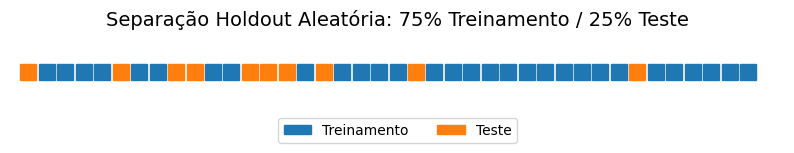

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Embaralhamento aleatório
n = 40
indices = np.random.permutation(n)
n_train = int(0.75 * n)

fig, ax = plt.subplots(figsize=(10, 1))

# Treino: azul, Teste: laranja
for idx in indices[:n_train]:
    ax.plot(idx, 0, 's', color='tab:blue', markersize=12)

for idx in indices[n_train:]:
    ax.plot(idx, 0, 's', color='tab:orange', markersize=12)

# Legenda
train_patch = mpatches.Patch(color='tab:blue', label='Treinamento')
test_patch = mpatches.Patch(color='tab:orange', label='Teste')
plt.legend(handles=[train_patch, test_patch], loc='upper center', bbox_to_anchor=(0.5, 0.0), ncol=2)

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-1, n+1)
ax.set_title("Separação Holdout Aleatória: 75% Treinamento / 25% Teste", fontsize=14)
plt.box(False)
plt.show()


## 🧪 Exercício: Implementando a Avaliação Holdout

Neste exercício, você vai criar uma função que **simula a técnica de Holdout**, realizando uma divisão aleatória entre treino e teste, treinando um classificador, e retornando as métricas de desempenho discutidas em aula.

---

### ✏️ **Tarefa**

1. **Implemente uma função chamada `avaliar_holdout` com os seguintes parâmetros:**
   - `X`: matriz de atributos (numpy array ou DataFrame)
   - `y`: vetor de rótulos (valores -1 ou +1)
   - `modelo`: uma função/classificador — **utilize exclusivamente os modelos desenvolvidos em sala de aula (ex: SVM com programação convexa)**.
   - `p`: proporção de amostras para treino (ex: `p=0.75`)

2. A função deve:
   - Embaralhar os dados de forma aleatória.
   - Separar os dados em `p%` para treino e `1-p` para teste.
   - Treinar o modelo nos dados de treino.
   - Avaliar o modelo nos dados de teste.
   - Calcular e **retornar todas as seguintes métricas**:
     - Acurácia
     - Precisão
     - Revocação (Recall)
     - F1-score
     - Especificidade
     - MCC (coeficiente de Matthews)
     - Acurácia balanceada
     - Taxa de falsos positivos (FPR)


---

### 🚢 **Teste com os dados do Titanic**

3. Use os seguintes passos para testar sua função com os dados do Titanic:

   - Carregue os dados do link:
   
     https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

   - Selecione as colunas `Pclass`, `Sex`, `Age` e `Fare` como preditoras.
     - Codifique `Sex` como 0 ou 1.
     - Substitua valores ausentes de `Age` pela média.

   - Converta os rótulos da variável `Survived` de modo que:
     - `1` (sobreviveu) → `+1`
     - `0` (não sobreviveu) → `-1`

   - Aplique sua função `avaliar_holdout` utilizando o **classificador SVM implementado por você em sala de aula**.

---

### 🎯 **Objetivo**

Desenvolver familiaridade prática com:
- A lógica por trás da técnica Holdout
- Implementação de métricas de avaliação
- Aplicação do seu próprio classificador em um problema real

---

### ✅ Dica

Você já possui funções auxiliares prontas para:
- Calcular TP, TN, FP e FN
- Calcular cada métrica com base nesses valores

Use e reutilize essas funções dentro da `avaliar_holdout`.


In [ ]:
# Solução:~>

# Solução:

import pandas as pd

df = pd.read_csv('/content/train.csv')

# df.head()

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'] = df['Embarked'].apply(lambda x : 0 if x == 'S' else (1 if x == 'C' else 2))
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'male' else 1)

df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Survived'] = df['Survived'].apply(lambda x: 1 if x == 1 else -1)

X= df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df['Survived'].values

# kernel = lambda x, y: np.exp(-np.linalg.norm(x - y, axis=1)**2)

def kernel(X1, X2, gamma=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    # sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return X1 @ X2.T #np.dot(X1, X2)#np.exp(-gamma * sq_dists)

def avaliar_houldout(X, y, p=0.75):

  indices = np.random.permutation(len(X))
  n_treino = int(p * len(X))
  n_teste = len(X) - n_treino

  X_treino = X[indices[:n_treino]]
  y_treino = y[indices[:n_treino]]

  X_teste = X[indices[n_treino:]]
  y_teste = y[indices[n_treino:]]

  classificador, support_alphas, support_vectors, support_labels, b = treinar_svm_dual_generico(X_treino, y_treino, kernel_fn=kernel)

  y_pred = np.zeros((n_teste,))
  for i in range(n_teste):
    y_pred[i] = classificador(X_teste[i,:])

  tp, tn, fp, fn = confusion_counts(y_teste, y_pred)

  return tp, tn, fp, fn

tp, tn, fp, fn = avaliar_houldout(X, y, p=0.8)

print(f"TP = {tp}, TN = {tn}, FP = {fp}, FN = {fn}\n")

print("Acurácia:", accuracy(tp, tn, fp, fn))
print("Precisão:", precision(tp, fp))
print("Revocação (Recall):", recall(tp, fn))
print("F1-Score:", f1_score(tp, fp, fn))
print("Especificidade:", specificity(tn, fp))
print("NPV:", npv(tn, fn))
print("FPR (Taxa de falsos positivos):", false_positive_rate(fp, tn))
print("Balanced Accuracy:", balanced_accuracy(tp, fn, tn, fp))
print("MCC:", matthews_corrcoef(tp, tn, fp, fn))


TP = 46, TN = 95, FP = 17, FN = 21

Acurácia: 0.7877094972067039
Precisão: 0.7301587301587301
Revocação (Recall): 0.6865671641791045
F1-Score: 0.7076923076923077
Especificidade: 0.8482142857142857
NPV: 0.8189655172413793
FPR (Taxa de falsos positivos): 0.15178571428571427
Balanced Accuracy: 0.7673907249466951
MCC: 0.5419053987517076


## 🔁 Reamostragem: Random Subsampling (Repeated Holdout)

O **Random Subsampling** — também conhecido como **Repeated Holdout** — é uma variação da técnica de Holdout tradicional, que busca reduzir a **aleatoriedade** da avaliação preditiva.

---

### 🧠 Ideia principal

> Em vez de dividir o conjunto de treino uma única vez (como no Holdout simples), o Random Subsampling realiza o processo de **divisão aleatória, treinamento e avaliação múltiplas vezes** — normalmente $K$ vezes.

---

### 🧪 Procedimento geral

Para cada repetição $k = 1, 2, \dots, K$:

1. Embaralhar aleatoriamente os dados
2. Dividir o conjunto de treino em duas partes:
   - Um subconjunto de treino (ex: 75%)
   - Um subconjunto de teste (25%)
3. Treinar o modelo no subconjunto de treino
4. Avaliar o modelo no subconjunto de teste
5. Calcular as métricas de desempenho

Após as $K$ execuções, **a média (e desvio padrão)** das métricas fornece uma estimativa mais robusta do desempenho preditivo do modelo.

---

### 📐 Motivação

O Holdout tradicional depende fortemente **da divisão aleatória feita uma única vez**. Com isso, o resultado pode ser enviesado por sorte ou azar na separação das amostras.

> Ao repetir a avaliação em diferentes divisões aleatórias, conseguimos uma **estimativa mais estável e confiável**.

---

### 🧮 Representação matemática

Seja $\mathcal{D}$ o conjunto de treino original.

Para $k = 1, 2, \dots, K$:

$$
\mathcal{D} = \mathcal{D}_{\text{train}}^{(k)} \cup \mathcal{D}_{\text{test}}^{(k)}, \quad \mathcal{D}_{\text{train}}^{(k)} \cap \mathcal{D}_{\text{test}}^{(k)} = \emptyset
$$

O erro preditivo estimado será:

$$
\hat{E} = \frac{1}{K} \sum_{k=1}^{K} E_k
$$

Onde $E_k$ é o valor de uma métrica (por exemplo, o erro de classificação) obtido na $k$-ésima repetição.

---

### ✅ Vantagens

- Estimativa mais estável que o Holdout simples
- Fácil de implementar
- Permite analisar a **variabilidade** das métricas

---

### ⚠️ Desvantagens

- Pode haver **sobreposição** de exemplos entre treino e teste em diferentes repetições
- Mais **custoso computacionalmente**, pois o modelo precisa ser reentreinado $K$ vezes
- Não garante que todos os exemplos sejam testados (diferente do K-Fold)

---

Nos próximos tópicos, veremos uma alternativa sistemática que garante que **todos os exemplos sejam avaliados exatamente uma vez por repetição**: a **Validação Cruzada (K-Fold)**.


<ipython-input-25-929dbb47cea3>:37: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-25-929dbb47cea3>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


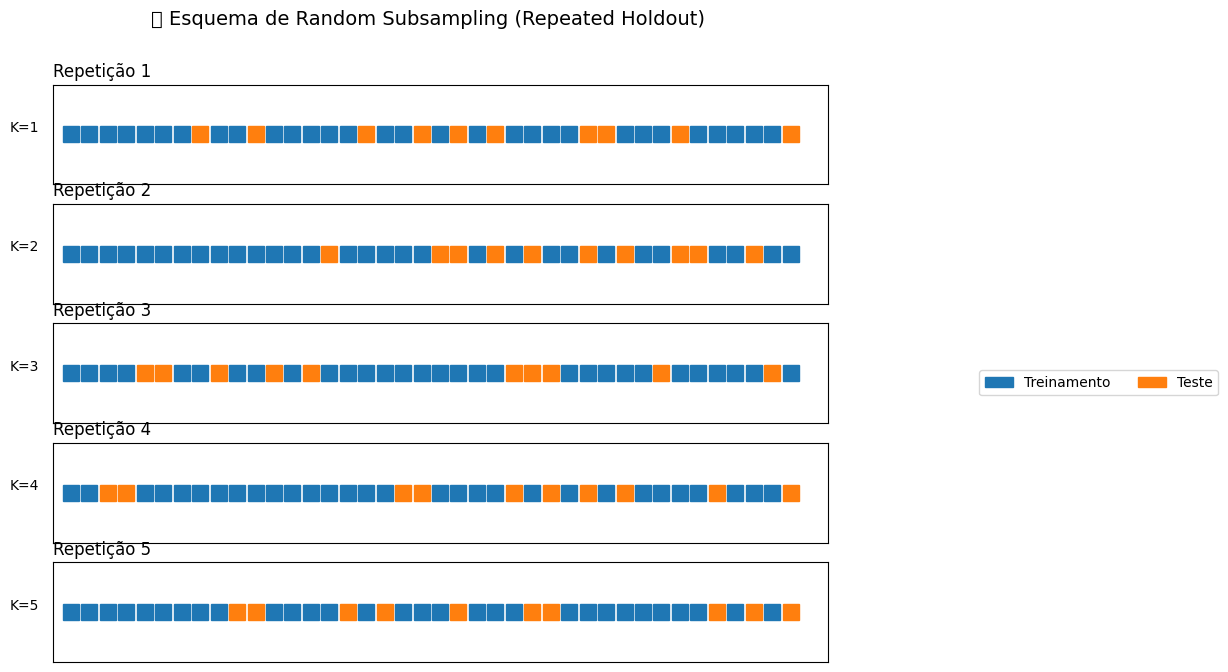

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Parâmetros
n = 40      # número total de amostras
K = 5       # número de repetições
p_treino = 0.75

# Configuração do gráfico
fig, ax = plt.subplots(K, 1, figsize=(10, 1.5 * K))

for k in range(K):
    indices = np.random.permutation(n)
    n_train = int(p_treino * n)

    # Plotando amostras de treino
    for idx in indices[:n_train]:
        ax[k].plot(idx, 0, 's', color='tab:blue', markersize=12)

    # Plotando amostras de teste
    for idx in indices[n_train:]:
        ax[k].plot(idx, 0, 's', color='tab:orange', markersize=12)

    ax[k].set_yticks([])
    ax[k].set_xticks([])
    ax[k].set_xlim(-1, n+1)
    ax[k].set_title(f"Repetição {k+1}", loc='left')
    ax[k].set_ylabel(f"K={k+1}", rotation=0, labelpad=20)

# Legenda
train_patch = mpatches.Patch(color='tab:blue', label='Treinamento')
test_patch = mpatches.Patch(color='tab:orange', label='Teste')
plt.legend(handles=[train_patch, test_patch], loc='upper center', bbox_to_anchor=(1.35, 3), ncol=2)

plt.suptitle("🔁 Esquema de Random Subsampling (Repeated Holdout)", fontsize=14)
plt.tight_layout()
plt.show()


## 🔁 Exercício: Avaliação com Random Subsampling (Repeated Holdout)

Neste exercício, você irá implementar a técnica de **Random Subsampling**, também conhecida como **Repeated Holdout**. Essa técnica consiste em aplicar o procedimento de Holdout múltiplas vezes com divisões aleatórias diferentes, de modo a obter uma **estimativa mais estável** do desempenho preditivo do modelo.

---

### ✏️ **Tarefa**

1. **Implemente uma função chamada `avaliar_random_subsampling` com os seguintes parâmetros:**
   - `X`: matriz de atributos
   - `y`: vetor de rótulos
   - `modelo`: classificador **utilize exclusivamente o modelo de SVM desenvolvido em sala**
   - `p`: proporção de amostras para treino em cada repetição (ex: `p=0.75`)
   - `K`: número de repetições (ex: `K=5`)

2. A função deve:
   - Repetir `K` vezes:
     - Embaralhar os dados aleatoriamente
     - Dividir os dados em treino e teste (com proporção `p`)
     - Treinar o modelo no subconjunto de treino
     - Avaliar no subconjunto de teste
     - Calcular todas as métricas:  
       - Acurácia  
       - Precisão  
       - Revocação  
       - F1-score  
       - Especificidade  
       - MCC  
       - Acurácia balanceada  
       - FPR  
   - Retornar a **média e o desvio padrão** de cada métrica ao final das $K$ repetições

---

### 🚢 **Teste com os dados do Titanic**

3. Use os mesmos dados do exercício anterior:
   - Base:  
     ```
     https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
     ```
   - Atributos: `Pclass`, `Sex`, `Age`, `Fare` (com tratamento e codificação)
   - Alvo: `Survived` (convertido para -1 e +1)

4. **Aplique sua função `avaliar_random_subsampling`** para os seguintes valores de $K$:
   - $K = 2$
   - $K = 5$
   - $K = 10$

---

### 📌 **Reflexão e Discussão**

5. Compare os resultados obtidos para diferentes valores de $K$:
   - As métricas ficaram mais estáveis com mais repetições?
   - Houve muita variação entre as rodadas?
   - Qual parece ser um bom número de repetições para essa base?

> ✍️ Escreva um pequeno parágrafo com suas observações.

---

### 🎯 **Objetivo**

Aprofundar a compreensão sobre a influência da **aleatoriedade na avaliação de modelos**, e como a técnica de **repetição de Holdout** pode ajudar a obter estimativas mais robustas do desempenho real.

---

### ✅ Dica

Você pode aproveitar a função `avaliar_holdout` construída no exercício anterior e apenas repetir sua execução $K$ vezes, armazenando os resultados em listas e depois computando média e desvio padrão.


In [ ]:
# Solução:~>

# Solução:~>

# Solução:

import pandas as pd

df = pd.read_csv('/content/train.csv')

# df.head()

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df['Embarked'] = df['Embarked'].apply(lambda x : 0 if x == 'S' else (1 if x == 'C' else 2))
df['Sex'] = df['Sex'].apply(lambda x : 0 if x == 'male' else 1)

df['Age'] = df['Age'].fillna(df['Age'].mean())

df['Survived'] = df['Survived'].apply(lambda x: 1 if x == 1 else -1)

X= df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].values
y = df['Survived'].values

# kernel = lambda x, y: np.exp(-np.linalg.norm(x - y, axis=1)**2)

def kernel(X1, X2, gamma=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    # sq_dists = np.sum(X1**2, axis=1)[:, None] + np.sum(X2**2, axis=1) - 2 * X1 @ X2.T
    return X1 @ X2.T #np.dot(X1, X2)#np.exp(-gamma * sq_dists)

def avaliar_houldout(X, y, p=0.75):

  indices = np.random.permutation(len(X))
  n_treino = int(p * len(X))
  n_teste = len(X) - n_treino

  X_treino = X[indices[:n_treino]]
  y_treino = y[indices[:n_treino]]

  X_teste = X[indices[n_treino:]]
  y_teste = y[indices[n_treino:]]

  try:

    classificador, support_alphas, support_vectors, support_labels, b = treinar_svm_dual_generico(X_treino, y_treino, kernel_fn=kernel)

  except:

    tp, tn, fp, fn = avaliar_houldout(X, y, p)
    return tp, tn, fp, fn

  y_pred = np.zeros((n_teste,))
  for i in range(n_teste):
    y_pred[i] = classificador(X_teste[i,:])

  tp, tn, fp, fn = confusion_counts(y_teste, y_pred)

  return tp, tn, fp, fn

def random_subsampling(X, y, K=5, p=0.75):
  tp_list = []
  tn_list = []
  fp_list = []
  fn_list = []

  for k in range(K):

    print(k, "-ésima partição...")

    tp, tn, fp, fn = avaliar_houldout(X, y, p=0.8)

    tp_list.append(tp)
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)

  return tp_list, tn_list, fp_list, fn_list

tp_list, tn_list, fp_list, fn_list = random_subsampling(X, y, K=5, p=0.8)

print(f"TP = {tp_list}, TN = {tn_list}, FP = {fp_list}, FN = {fn_list}\n")

print("Acurácia:", np.mean([accuracy(tp, tn, fp, fn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("Precisão:", np.mean([precision(tp, fp) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("Revocação (Recall):", np.mean([recall(tp, fn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("F1-Score:", np.mean([f1_score(tp, fp, fn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("Especificidade:", np.mean([specificity(tn, fp) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("NPV:", np.mean([npv(tn, fn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("FPR (Taxa de falsos positivos):", np.mean([false_positive_rate(fp, tn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("Balanced Accuracy:", np.mean([balanced_accuracy(tp, fn, tn, fp) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))
print("MCC:", np.mean([matthews_corrcoef(tp, tn, fp, fn) for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list)]))


0 -ésima partição...
1 -ésima partição...
2 -ésima partição...
3 -ésima partição...
4 -ésima partição...
TP = [52, 50, 47, 51, 47], TN = [97, 86, 98, 91, 92], FP = [14, 20, 14, 19, 15], FN = [16, 23, 20, 18, 25]

Acurácia: 0.794413407821229
Precisão: 0.7518584500287302
Revocação (Recall): 0.708607627815215
F1-Score: 0.729020117847899
Especificidade: 0.8494560879951463
NPV: 0.8198187103112499
FPR (Taxa de falsos positivos): 0.15054391200485365
Balanced Accuracy: 0.7790318579051808
MCC: 0.5647919189705027


## 📦 K-Fold Cross-Validation

A técnica de **K-Fold Cross-Validation** é uma das formas mais amplamente utilizadas para estimar o desempenho preditivo de um modelo de aprendizado de máquina.

---

### 🧠 Ideia principal

> O conjunto de dados de treino é dividido em $K$ **partições (folds)** aproximadamente do mesmo tamanho.  
> Em cada uma das $K$ iterações:
> - Um fold é usado como **teste**
> - Os $K - 1$ folds restantes são usados como **treinamento**

O processo é repetido $K$ vezes, de forma que **cada exemplo é utilizado exatamente uma vez como teste**.

---

### 🧪 Motivação

Diferente do Holdout ou Random Subsampling, onde **nem todos os exemplos são testados** (e alguns podem ser testados várias vezes), o K-Fold garante:

- **Cobertura total do conjunto**: todos os exemplos são usados tanto para treino quanto para teste (em momentos diferentes).
- **Avaliação balanceada**: evita viés de divisão aleatória única.

---

### 🧮 Representação matemática

Seja o conjunto de dados de treino:

$$
\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^n
$$

Dividimos $\mathcal{D}$ em $K$ subconjuntos disjuntos:

$$
\mathcal{D} = \bigcup_{k=1}^K \mathcal{F}_k, \quad \mathcal{F}_i \cap \mathcal{F}_j = \emptyset \text{ se } i \ne j
$$

Em cada iteração $k = 1, 2, \dots, K$:
- Usamos $\mathcal{F}_k$ como conjunto de teste
- Usamos $\mathcal{D} \setminus \mathcal{F}_k$ como conjunto de treino

O erro médio estimado é:

$$
\hat{E} = \frac{1}{K} \sum_{k=1}^{K} E_k
$$

---

### ⚙️ Algoritmo (em pseudocódigo LaTeX)

$$
\begin{array}{l}
\textbf{Entrada: } \mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}, \text{ número de folds } K \\
\textbf{Saída: } \text{média das métricas de desempenho} \\
\\
1. \text{Divida } \mathcal{D} \text{ em } K \text{ subconjuntos disjuntos } \mathcal{F}_1, \dots, \mathcal{F}_K \\
2. \text{Para cada } k = 1, \dots, K: \\
\quad a) \mathcal{D}_{\text{train}} = \bigcup_{j \ne k} \mathcal{F}_j \\
\quad b) \mathcal{D}_{\text{test}} = \mathcal{F}_k \\
\quad c) \text{Treine o modelo com } \mathcal{D}_{\text{train}} \\
\quad d) \text{Avalie com } \mathcal{D}_{\text{test}} \\
\quad e) \text{Calcule as métricas } E_k \\
3. \text{Retorne } \hat{E} = \frac{1}{K} \sum_{k=1}^{K} E_k
\end{array}
$$

---

### ✅ Vantagens

- Usa **todos os dados** para treino e teste
- Reduz a **variância da estimativa**
- Apropriado mesmo quando o conjunto é pequeno

---

### ⚠️ Desvantagens

- Mais **custoso computacionalmente** que Holdout (treina o modelo $K$ vezes)
- Não é ideal quando os dados têm dependência temporal (ex: séries temporais)

---

### 🎨 Ilustração: K = 5

Cada linha representa uma iteração. A parte laranja é o fold de teste e a parte azul é usada para treino:

*Veja o gráfico gerado abaixo para o esquema visual.*


<ipython-input-7-eb19af4090ad>:37: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


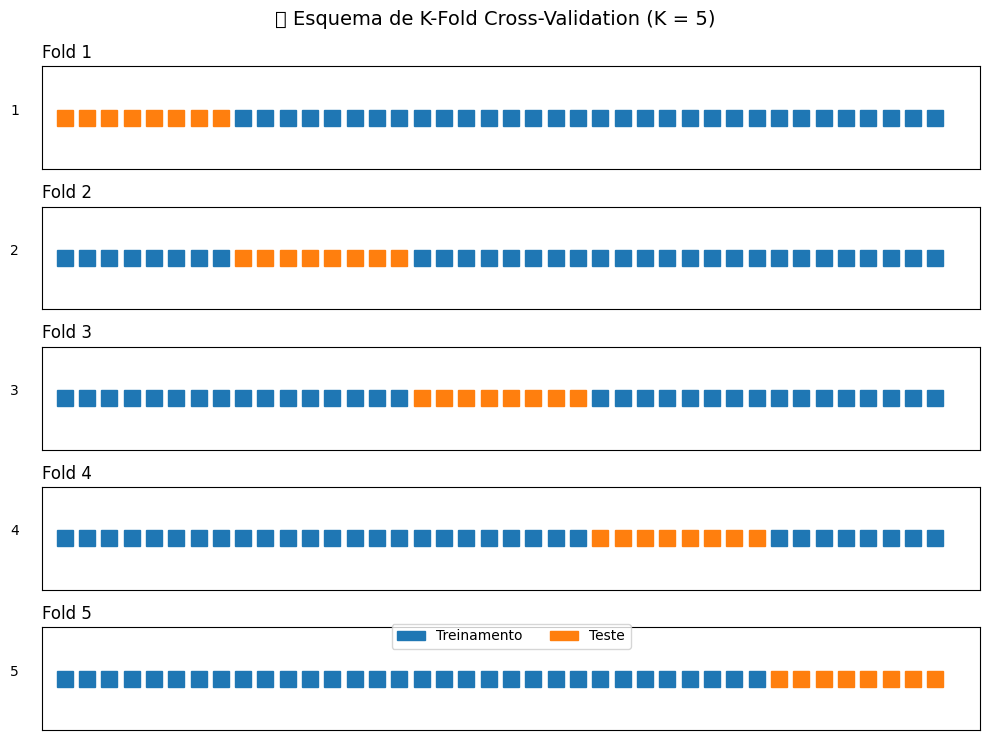

In [ ]:
# Gerar novamente a ilustração de K-Fold Cross-Validation

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Parâmetros
n = 40       # número total de amostras
K = 5        # número de folds
indices = np.arange(n)
folds = np.array_split(indices, K)

# Configuração do gráfico
fig, ax = plt.subplots(K, 1, figsize=(10, 1.5 * K))

for k in range(K):
    test_idx = folds[k]
    train_idx = np.setdiff1d(indices, test_idx)

    for idx in train_idx:
        ax[k].plot(idx, 0, 's', color='tab:blue', markersize=12)
    for idx in test_idx:
        ax[k].plot(idx, 0, 's', color='tab:orange', markersize=12)

    ax[k].set_yticks([])
    ax[k].set_xticks([])
    ax[k].set_xlim(-1, n + 1)
    ax[k].set_title(f"Fold {k + 1}", loc='left')
    ax[k].set_ylabel(f"{k+1}", rotation=0, labelpad=20)

# Legenda
train_patch = mpatches.Patch(color='tab:blue', label='Treinamento')
test_patch = mpatches.Patch(color='tab:orange', label='Teste')
plt.legend(handles=[train_patch, test_patch], loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)

plt.suptitle("📦 Esquema de K-Fold Cross-Validation (K = 5)", fontsize=14)
plt.tight_layout()
plt.show()


## 📦 Exercício: Avaliação com K-Fold Cross-Validation

Neste exercício, você irá implementar a técnica de **K-Fold Cross-Validation** a partir do zero. Essa técnica permite avaliar o desempenho de um modelo utilizando todo o conjunto de treino, alternando os exemplos usados para teste em cada repetição.

---

### ✏️ **Tarefa**

1. **Implemente uma função chamada `avaliar_kfold` com os seguintes parâmetros:**
   - `X`: matriz de atributos
   - `y`: vetor de rótulos
   - `modelo`: classificador  — **utilize exclusivamente a versão da SVM implementada em sala**
   - `K`: número de folds (ex: `K=5`)

2. A função deve:
   - Embaralhar os dados aleatoriamente no início.
   - Dividir os dados em `K` blocos aproximadamente do mesmo tamanho (sem sobreposição).
   - Para cada fold $k = 1, \dots, K$:
     - Use o $k$-ésimo bloco como **teste**
     - Use os demais blocos como **treinamento**
     - Treine o modelo e calcule todas as métricas:
       - Acurácia  
       - Precisão  
       - Revocação  
       - F1-score  
       - Especificidade  
       - MCC  
       - Acurácia balanceada  
       - FPR  
   - Retornar a **média e o desvio padrão** de cada métrica ao final dos $K$ folds


---

### 🚢 **Teste com os dados do Titanic**

3. Use os dados do Titanic já preparados (como nos exercícios anteriores):
   - Base:  
     ```
     https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
     ```
   - Atributos: `Pclass`, `Sex`, `Age`, `Fare` (com tratamento e codificação apropriados)
   - Alvo: `Survived`, mapeado para `+1` (sobreviveu) e `-1` (não sobreviveu)

4. Aplique a função `avaliar_kfold` com os seguintes valores de $K$:
   - $K = 4$
   - $K = 10$

---

### 📌 **Reflexão e Discussão**

5. Compare os resultados obtidos com $K = 4$ e $K = 10$:
   - As métricas mudaram significativamente?
   - Houve redução da variância com mais folds?
   - O tempo de execução aumentou?

> ✍️ Escreva um parágrafo curto comentando suas observações.

---

### 🎯 **Objetivo**

Compreender e implementar a estratégia de **validação cruzada sistemática**, observando na prática como diferentes divisões podem impactar a avaliação preditiva do modelo.

---

### ✅ Dica

Você pode reaproveitar suas funções de métricas e a lógica da função `avaliar_holdout`, adaptando para iterar sobre partições fixas de tamanho aproximadamente igual.


In [ ]:
# Solução:~>

## 🧪 Leave-One-Out (LOOCV): um caso extremo do K-Fold

A técnica de **Leave-One-Out Cross-Validation (LOOCV)** é um **caso especial do K-Fold**, em que o número de folds $K$ é igual ao número de exemplos no conjunto de dados, ou seja:

$$
K = n
$$

---

### ⚙️ Como funciona?

- Para cada instância $(\mathbf{x}_i, y_i)$ no conjunto de dados:
  - Treina-se o modelo com os outros $n-1$ exemplos.
  - Avalia-se o modelo **exatamente naquele único exemplo deixado de fora**.

No final, cada amostra foi utilizada como teste **uma única vez**, e o erro médio é calculado sobre todos os exemplos.

---

### ✅ Vantagens

- **Máximo aproveitamento dos dados**: cada modelo é treinado com quase todos os exemplos ($n-1$).
- Não depende da aleatoriedade da divisão.
- Útil quando temos **pouquíssimos dados**.

---

### ⚠️ Desvantagens

- **Altíssimo custo computacional**: o modelo é treinado $n$ vezes, uma para cada exemplo.
- Pode levar a **alta variância nas estimativas** — pois cada modelo é avaliado em **apenas um exemplo**, o que pode ser instável.
- Não apropriado para modelos que demoram para treinar.

---

### 🎯 Quando usar?

- Quando o conjunto de dados é **muito pequeno** e perder um único exemplo no treino já comprometeria a aprendizagem.
- Quando se deseja uma **estimativa sem variação aleatória** (não há sorte na divisão).

---

### ❌ Quando evitar?

- Quando o conjunto de dados é **médio ou grande**.
- Quando o modelo tem **tempo de treinamento elevado**.
- Quando há muito ruído — pois o erro em um único ponto pode distorcer a média geral.

---

Em resumo, o LOOCV é uma técnica conceitualmente interessante e exaustiva, mas seu uso na prática requer cuidado — especialmente em contextos com modelos pesados ou dados instáveis.


## 📊 Bootstrap: avaliação por reamostragem com reposição

A técnica de **Bootstrap** é uma abordagem de reamostragem estatística que permite **estimar o desempenho preditivo de um modelo** utilizando **múltiplas amostras geradas com reposição** a partir do conjunto de dados original.

---

### 🧠 Ideia principal

> Em vez de dividir os dados de forma fixa (como no Holdout ou K-Fold), o Bootstrap **gera várias amostras aleatórias com reposição** a partir do conjunto de dados original.  
> Em cada repetição:
> - Treina-se o modelo em uma amostra **com reposição** do conjunto original.
> - Avalia-se o modelo nos exemplos que **não foram sorteados** — o chamado **conjunto fora da amostra** (*out-of-bag*).

---

### 🔁 Detalhes importantes

- O conjunto de treino $\mathcal{D}_{\text{train}}$ contém **exatamente $n$ exemplos** (o mesmo número de exemplos da base original),  
  **mas com elementos repetidos**, pois a amostragem é feita **com reposição**.

- O conjunto de teste $\mathcal{D}_{\text{test}}$ (também chamado de **out-of-bag**) é composto pelos exemplos que **não foram sorteados** naquela repetição.  
  Seu tamanho é **variável** e, em média, corresponde a cerca de **36.8%** da base original.

---

### 📌 Por que 36.8% dos exemplos ficam fora da amostra?

A probabilidade de **um exemplo específico não ser sorteado** em uma amostragem com reposição de tamanho $n$ é:

$$
\left(1 - \frac{1}{n} \right)^n \approx e^{-1} \approx 0.368
$$

Isso significa que, em média, **cerca de 36.8% dos exemplos não aparecem** em cada amostra Bootstrap → e são usados como **teste** naquela repetição.

---

### 🧮 Fundamentação matemática

Dado um conjunto de dados original $\mathcal{D} = \{ (\mathbf{x}_i, y_i) \}_{i=1}^{n}$, para cada repetição $b = 1, \dots, B$:

- $\mathcal{D}_{\text{train}}^{(b)}$: amostragem com reposição de $n$ exemplos de $\mathcal{D}$ (pode conter repetições)
- $\mathcal{D}_{\text{test}}^{(b)} = \mathcal{D} \setminus \mathcal{D}_{\text{train}}^{(b)}$: os exemplos não sorteados (sem sobreposição)

O erro médio estimado por Bootstrap é:

$$
\hat{E}_{\text{bootstrap}} = \frac{1}{B} \sum_{b=1}^{B} E_b
$$

---

### ⚙️ Algoritmo (pseudocódigo em LaTeX)

$$
\begin{array}{l}
\textbf{Entrada: } \mathcal{D}, \text{ número de repetições } B \\
\textbf{Saída: } \text{média das métricas de desempenho} \\
\\
\text{Para } b = 1 \text{ até } B: \\
\quad \text{1. Sorteie com reposição } n \text{ elementos de } \mathcal{D} \rightarrow \mathcal{D}_{\text{train}}^{(b)} \\
\quad \text{2. Defina } \mathcal{D}_{\text{test}}^{(b)} = \mathcal{D} \setminus \mathcal{D}_{\text{train}}^{(b)} \\
\quad \text{3. Treine o modelo com } \mathcal{D}_{\text{train}}^{(b)} \\
\quad \text{4. Avalie com } \mathcal{D}_{\text{test}}^{(b)} \\
\quad \text{5. Calcule as métricas } E_b \\
\text{Retorne } \hat{E} = \frac{1}{B} \sum_{b=1}^{B} E_b
\end{array}
$$

---

### ✅ Vantagens

- Usa o mesmo conjunto de dados de forma intensiva
- Estimativas robustas mesmo com **pequenos conjuntos**
- Permite **avaliar a variabilidade** do desempenho

---

### ⚠️ Desvantagens

- Amostras de treino contêm exemplos **repetidos**
- Modelos sensíveis a duplicação podem se comportar de forma não ideal
- Pode ser mais **complexo de implementar** corretamente

---

### 🎨 Ilustração: Bootstrap com B = 5

Cada linha da figura abaixo representa uma repetição do Bootstrap:

- Os **quadrados azuis** representam exemplos sorteados **com reposição** para treino
- Os **"X" vermelhos** marcam os exemplos que **ficaram fora da amostra** e foram usados como **teste**

*Veja o gráfico abaixo para entender visualmente a estrutura.*


<ipython-input-9-9edf30ef41d7>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


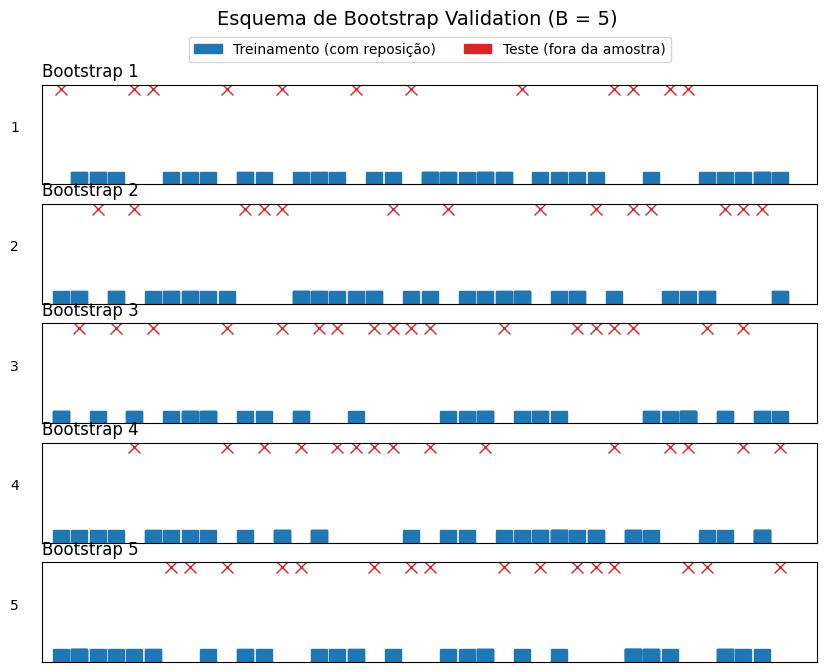

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Simulação de Bootstrap
n = 40       # número total de amostras
B = 5        # número de repetições (bootstrap rounds)

fig, ax = plt.subplots(B, 1, figsize=(10, 1.5 * B))

# Amostras bootstrap
np.random.seed(42)
for b in range(B):
    sample = np.random.choice(np.arange(n), size=n, replace=True)
    test = np.setdiff1d(np.arange(n), sample)

    # Treinamento (amostragem com reposição)
    for idx in sample:
        ax[b].plot(idx, 0, 's', color='tab:blue', markersize=12)

    # Teste (fora da amostra)
    for idx in test:
        ax[b].plot(idx, 0.2, 'x', color='tab:red', markersize=8)

    ax[b].set_yticks([])
    ax[b].set_xticks([])
    ax[b].set_xlim(-1, n + 1)
    ax[b].set_title(f"Bootstrap {b+1}", loc='left')
    ax[b].set_ylabel(f"{b+1}", rotation=0, labelpad=20)

# Legenda
train_patch = mpatches.Patch(color='tab:blue', label='Treinamento (com reposição)')
test_patch = mpatches.Patch(color='tab:red', label='Teste (fora da amostra)')
plt.legend(handles=[train_patch, test_patch], loc='upper center', bbox_to_anchor=(0.5, 6.35), ncol=2)

plt.suptitle("Esquema de Bootstrap Validation (B = 5)", fontsize=14)
plt.tight_layout()
plt.show()


## Exercício: Avaliação de Modelos com Bootstrap

Neste exercício, você vai implementar a técnica de **Bootstrap** para avaliação preditiva de modelos de classificação. A ideia é repetir o processo de treinamento e teste diversas vezes, utilizando **amostragens com reposição** e avaliando o desempenho do modelo nos exemplos **fora da amostra (out-of-bag)**.

---

### ✏️ **Tarefa**

1. **Implemente uma função chamada `avaliar_bootstrap` com os seguintes parâmetros:**
   - `X`: matriz de atributos
   - `y`: vetor de rótulos
   - `modelo`: classificador  **utilize o modelo SVM desenvolvido em sala**
   - `B`: número de repetições do Bootstrap (ex: `B=10`)

2. A função deve:
   - Para cada repetição $b = 1, \dots, B$:
     - Gerar uma amostra de **treino** com **$n$ elementos sorteados com reposição**
     - Identificar os exemplos **fora da amostra** para serem usados como **teste**
     - Treinar o modelo nos dados sorteados
     - Avaliar nos dados fora da amostra
     - Calcular as seguintes métricas:
       - Acurácia  
       - Precisão  
       - Revocação  
       - F1-score  
       - Especificidade  
       - MCC  
       - Acurácia balanceada  
       - FPR  
   - Retornar a **média e o desvio padrão** de cada métrica ao final das $B$ repetições
   

---

### 🚢 **Teste com os dados do Titanic**

3. Utilize os mesmos dados preparados nos exercícios anteriores:

   - Base:  
     ```
     https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
     ```
   - Atributos: `Pclass`, `Sex`, `Age`, `Fare` (com tratamento e codificação)
   - Alvo: `Survived` convertido para:
     - `1` → `+1`
     - `0` → `-1`

4. Execute sua função `avaliar_bootstrap` com diferentes valores de $B$:
   - $B = 5$
   - $B = 10$
   - $B = 30$

---

### 📌 **Reflexão e Discussão**

5. Compare os resultados obtidos:
   - A estimativa de desempenho se estabilizou com $B$ maior?
   - Como os resultados se comparam aos obtidos com Holdout e K-Fold?
   - Alguma métrica apresentou maior variação?

> ✍️ Escreva um parágrafo com suas observações.

---

### 🎯 **Objetivo**

Compreender na prática a **lógica de reamostragem com reposição**, avaliando como o Bootstrap permite estimar o desempenho preditivo de um modelo mesmo com conjuntos limitados de dados.

---

### ✅ Dica

Use `np.random.choice(..., replace=True)` para gerar as amostras com reposição, e `np.setdiff1d(...)` para identificar os índices fora da amostra (out-of-bag).


In [ ]:
# Solução:~>

## 🔁 N×K-Fold Cross-Validation (Repeated K-Fold)

A **validação cruzada repetida**, também chamada de **N×K-Fold Cross-Validation**, é uma técnica que consiste em:

> Repetir o processo de **K-Fold Cross-Validation** um total de **N vezes**, com diferentes embaralhamentos dos dados.

---

### 🧠 Motivação

A validação cruzada tradicional com $K$ folds fornece uma estimativa do erro preditivo, mas ainda está sujeita à variância resultante da forma como os dados foram particionados.

> Ao repetir o K-Fold diversas vezes, conseguimos obter uma **estimativa mais estável** do desempenho médio e também da **variabilidade** do modelo.

---

### 🧮 Fundamentação matemática

Seja $\mathcal{D}$ o conjunto de dados com $n$ exemplos.

O procedimento é:

- Para $r = 1, 2, \dots, N$ (repetições):
  - Embaralhe aleatoriamente $\mathcal{D}$
  - Divida em $K$ folds: $\mathcal{F}_1^{(r)}, \dots, \mathcal{F}_K^{(r)}$
  - Para cada $k = 1, \dots, K$:
    - $\mathcal{F}_k^{(r)}$ é o conjunto de teste
    - $\bigcup_{j \ne k} \mathcal{F}_j^{(r)}$ é o conjunto de treino
    - Treine o modelo, calcule a métrica de desempenho $E_{r,k}$

A média geral das métricas é:

$$
\hat{E} = \frac{1}{N \cdot K} \sum_{r=1}^{N} \sum_{k=1}^{K} E_{r,k}
$$

---

### ⚙️ Algoritmo (pseudocódigo LaTeX)

$$
\begin{array}{l}
\textbf{Entrada: } \mathcal{D}, N, K \\
\textbf{Saída: } \text{média e desvio das métricas de desempenho} \\
\\
\text{Para } r = 1 \text{ até } N: \\
\quad \text{1. Embaralhar aleatoriamente } \mathcal{D} \\
\quad \text{2. Dividir em } K \text{ folds } \mathcal{F}_1^{(r)}, \dots, \mathcal{F}_K^{(r)} \\
\quad \text{Para } k = 1 \text{ até } K: \\
\qquad \text{Treinar com } \bigcup_{j \ne k} \mathcal{F}_j^{(r)} \\
\qquad \text{Testar com } \mathcal{F}_k^{(r)} \rightarrow E_{r,k} \\
\text{Retornar } \hat{E} = \frac{1}{N \cdot K} \sum_{r=1}^{N} \sum_{k=1}^{K} E_{r,k}
\end{array}
$$

---

### 📌 Exemplos práticos

- **5×2** Cross-Validation → $N = 5$, $K = 2$  
- **10×10** Cross-Validation → $N = 10$, $K = 10$

---

### ✅ Vantagens

- Permite **quantificar a variância do desempenho**
- Estimativas mais **estáveis e confiáveis** do que um único K-Fold
- Útil para **comparação estatística entre modelos**

---

### ⚠️ Desvantagens

- **Custo computacional elevado** (treinamento em $N \cdot K$ rodadas)
- Pode exigir controle de **balanceamento de classes** por fold

---

### 🎯 Quando usar?

- Quando o conjunto de dados **não é muito grande**
- Quando você precisa **avaliar a robustez** de um modelo ou **comparar modelos**
- Quando pretende aplicar **testes estatísticos** (ex: t-test pareado)

---

### 🎨 Ilustração

Na figura abaixo, você vê o caso de **5×2 cross-validation**:

- 5 repetições horizontais
- Cada repetição com 2 folds (cada fold usado uma vez como teste)
- Azul = treino | Laranja = teste

Esse mesmo raciocínio se aplica para qualquer valor de $N$ e $K$.


<ipython-input-11-f6d951a72122>:36: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


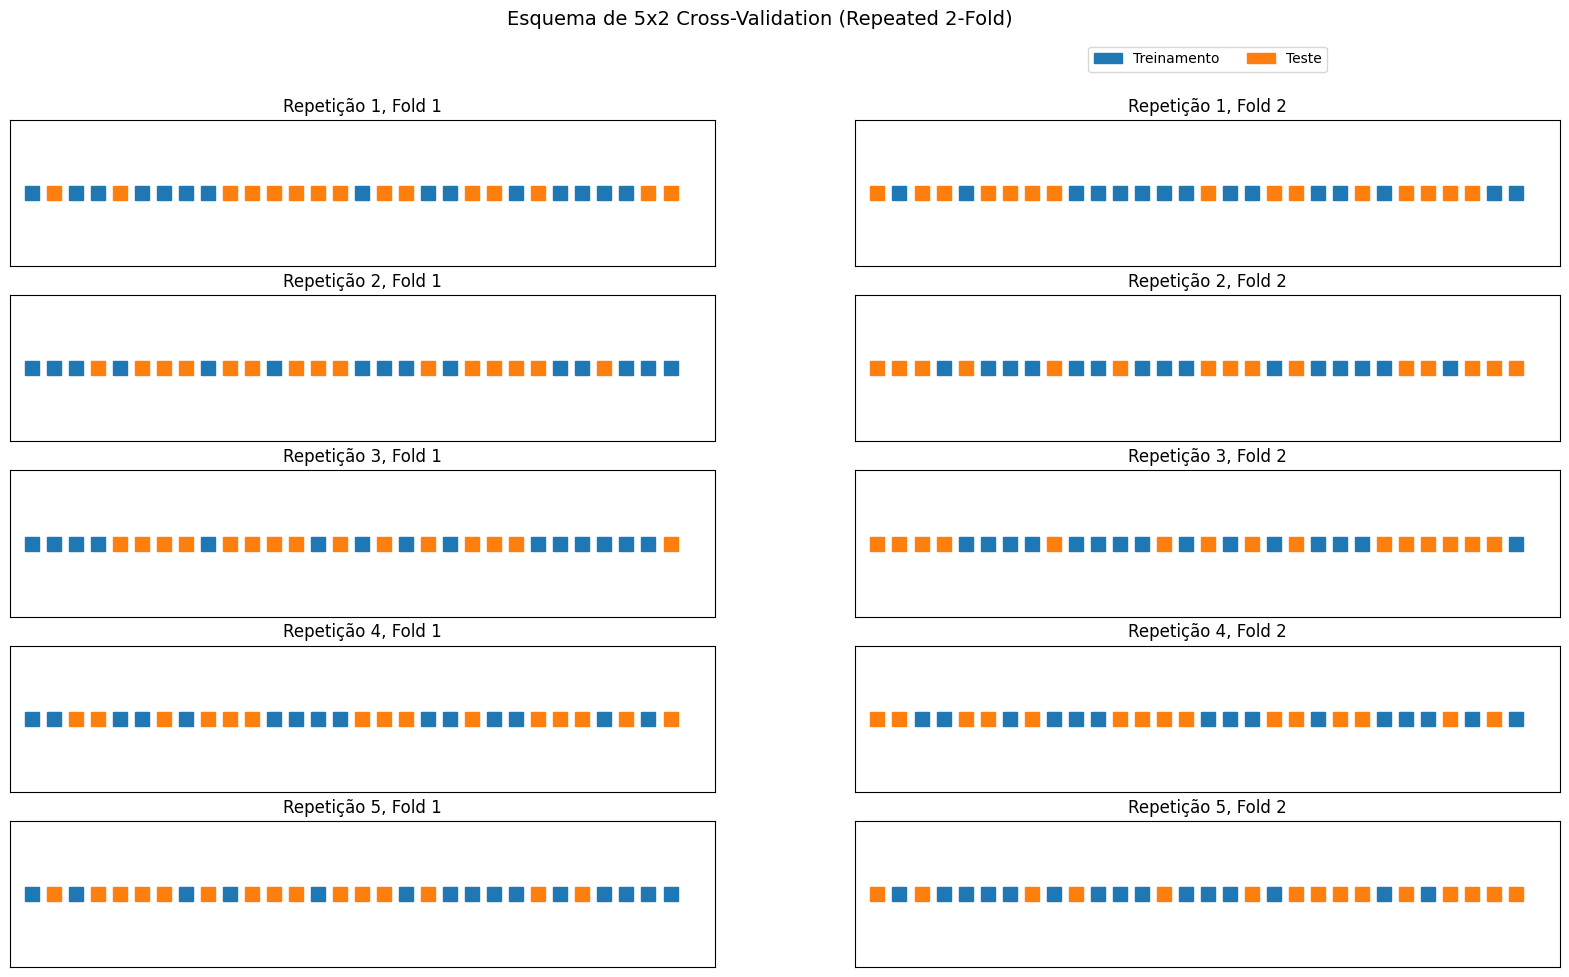

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Parâmetros
n = 30            # número total de amostras
R = 5             # número de repetições
K = 2             # número de folds

fig, axes = plt.subplots(R, K, figsize=(20, 2.2 * R))

for r in range(R):
    indices = np.random.permutation(n)
    folds = np.array_split(indices, K)

    for k in range(K):
        test_idx = folds[k]
        train_idx = np.setdiff1d(indices, test_idx)

        for idx in train_idx:
            axes[r, k].plot(idx, 0, 's', color='tab:blue', markersize=10)
        for idx in test_idx:
            axes[r, k].plot(idx, 0, 's', color='tab:orange', markersize=10)

        axes[r, k].set_title(f"Repetição {r+1}, Fold {k+1}")
        axes[r, k].set_xticks([])
        axes[r, k].set_yticks([])
        axes[r, k].set_xlim(-1, n+1)

# Legenda
train_patch = mpatches.Patch(color='tab:blue', label='Treinamento')
test_patch = mpatches.Patch(color='tab:orange', label='Teste')
plt.legend(handles=[train_patch, test_patch], loc='upper center', bbox_to_anchor=(0.5, 6.35), ncol=2)

plt.suptitle("Esquema de 5x2 Cross-Validation (Repeated 2-Fold)", fontsize=14)
plt.tight_layout()
plt.show()


## 🔁 Exercício: Avaliação de Desempenho com N×K-Fold Cross-Validation

Neste exercício, você irá implementar uma **validação cruzada repetida**, também conhecida como **N×K-Fold Cross-Validation**, que consiste em aplicar a técnica de K-Fold múltiplas vezes com **embaralhamentos diferentes dos dados**.

---

### ✏️ **Tarefa**

1. **Implemente uma função chamada `avaliar_nkfold` com os seguintes parâmetros:**
   - `X`: matriz de atributos
   - `y`: vetor de rótulos
   - `modelo`: classificador com `.fit()` e `.predict()` — **utilize exclusivamente o modelo de SVM desenvolvido em sala**
   - `N`: número de repetições (ex: `N=5`)
   - `K`: número de folds em cada repetição (ex: `K=2`)

2. A função deve:
   - Para cada repetição $r = 1, \dots, N$:
     - Embaralhar os dados
     - Dividir em $K$ folds aproximadamente do mesmo tamanho
     - Para cada fold $k = 1, \dots, K$:
       - Usar o $k$-ésimo fold como **teste**
       - Usar os $K-1$ folds restantes como **treino**
       - Treinar o modelo e calcular as métricas:
         - Acurácia  
         - Precisão  
         - Revocação  
         - F1-score  
         - Especificidade  
         - MCC  
         - Acurácia balanceada  
         - FPR  
   - Retornar a **média e o desvio padrão** de cada métrica considerando as $N \cdot K$ avaliações


---

### 🚢 **Teste com os dados do Titanic**

3. Use os dados preparados anteriormente:

   - Base:  
     ```
     https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
     ```
   - Atributos: `Pclass`, `Sex`, `Age`, `Fare` (com tratamento e codificação)
   - Alvo: `Survived` convertido para:
     - `1` → `+1`
     - `0` → `-1`

4. Execute sua função `avaliar_nkfold` com as seguintes configurações:

   - $N = 5$, $K = 2$ (caso 5×2)
   - $N = 3$, $K = 5$
   - $N = 10$, $K = 10$

---

### 📌 **Reflexão e Discussão**

5. Compare os resultados obtidos:
   - Como o desempenho médio varia com diferentes valores de $N$ e $K$?
   - O desvio padrão das métricas aumentou ou diminuiu?
   - Há vantagem prática em aumentar $N$ ou $K$ indefinidamente?

> ✍️ Escreva um parágrafo refletindo sobre as vantagens e custos da validação cruzada repetida.

---

### 🎯 **Objetivo**

Aprofundar o entendimento sobre **estimativas robustas de desempenho preditivo**, explorando a influência de diferentes divisões e repetições na estabilidade dos resultados.

---

### ✅ Dica

Você pode reutilizar sua função de K-Fold comum como uma sub-rotina interna dentro da nova função `avaliar_nkfold`, controlando apenas o embaralhamento dos dados e o acúmulo dos resultados ao longo das repetições.


In [ ]:
# Solução:~>

## 🧾 Conclusão: Comparando Estratégias de Avaliação Preditiva

Ao longo desta seção, exploramos diversas estratégias de avaliação preditiva, cada uma com seus usos, vantagens e limitações. O **Holdout** é simples e rápido, mas sensível à forma como os dados são divididos — o que pode tornar sua estimativa instável. O **Random Subsampling** (ou Repeated Holdout) melhora essa estabilidade ao repetir o Holdout com diferentes amostragens aleatórias, mas não garante que todos os exemplos sejam usados. A **Validação Cruzada K-Fold** corrige isso dividindo os dados sistematicamente em $K$ blocos, garantindo que cada exemplo seja avaliado exatamente uma vez. Já o **Bootstrap** adota uma abordagem diferente, baseada em reamostragem com reposição, ideal para conjuntos pequenos e para quantificar a variabilidade do modelo, embora introduza duplicações e requira cuidado em sua interpretação. A **Validação Cruzada Aninhada** se destaca em cenários com ajuste de hiperparâmetros, separando claramente os dados de validação e de teste, enquanto a **N×K-Fold Cross-Validation** (como o 5×2) permite múltiplas estimativas independentes com diferentes embaralhamentos, sendo bastante utilizada em testes estatísticos. Em resumo, não existe uma técnica universalmente melhor: a escolha adequada depende do **volume de dados**, do **tempo computacional disponível** e da **finalidade da avaliação** — seja estimar o erro esperado com precisão, comparar modelos ou ajustar parâmetros com segurança.


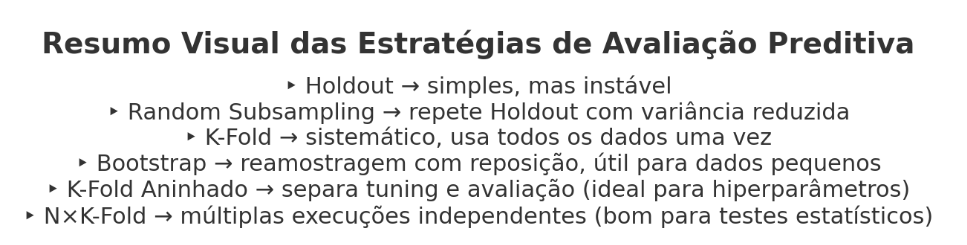

## 📋 Tabela Comparativa de Estratégias de Avaliação Preditiva

| Técnica                      | Usa todos os dados?                          | Estimativa estável?                    | Custo computacional | Indicado para                                         |
|-----------------------------|----------------------------------------------|----------------------------------------|----------------------|--------------------------------------------------------|
| Holdout                     | Não                                           | Não                                    | Baixo                | Modelos rápidos com muitos dados                      |
| Random Subsampling          | Não (em média)                               | Mais estável                           | Médio                | Estimativa média com controle de variabilidade        |
| K-Fold CV                   | Sim                                          | Sim                                    | Médio                | Avaliação geral e comparação de modelos               |
| Bootstrap                   | Sim (com repetição)                          | Sim (com variação quantificada)        | Alto                 | Dados pequenos e análise de variância                 |
| K-Fold Aninhado (Nested)    | Sim (camadas internas e externas)           | Sim (para seleção + avaliação)         | Muito alto           | Modelos com tuning de hiperparâmetros                 |
| N×K-Fold (Repeated K-Fold)  | Sim (em múltiplas execuções)                | Sim (múltiplas estimativas)            | Alto                 | Comparações estatísticas entre algoritmos             |
